# Lab 0: Introduction to ML Workflow and K-Nearest Neighbors

**Course:** Introduction to AI (Spring 2025/2026)  
**Instructor:** Yurii Hannich  
**Points:** 6  
**Completed:** During P1 session

---

## 🎯 Goals

This lab introduces you to:
- Working with Jupyter Notebooks
- GitHub Classroom workflow
- Basic ML pipeline: load data → train → predict → evaluate
- Your first ML algorithm: K-Nearest Neighbors

**Note:** This is a guided practice session. We'll implement simple functions together, and they will be automatically tested.

---

## Part 1: Setup and Data Loading

In [ ]:
! pip install numpy matplotlib scikit-learn

In [1]:
# Import libraries
import numpy as np  # For numerical operations and arrays
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.datasets import load_iris  # Built-in dataset loader
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.neighbors import KNeighborsClassifier  # Professional KNN implementation
from sklearn.metrics import accuracy_score  # For evaluating model performance

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: measurements of flowers
y = iris.target  # Labels: species (0, 1, or 2)

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"\nFirst 3 samples:\n{X[:3]}")
print(f"First 3 labels: {y[:3]}")

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 3 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
First 3 labels: [0 0 0]


### 🤔 Discussion Questions

Before we continue, let's think about what we're dealing with:

1. **What is the dimensionality of the feature space?**  
   _(Hint: How many features does each sample have?)_

2. **Is this a classification or regression task?**  
   _(Hint: Look at the target values - are they continuous numbers or discrete categories?)_

3. **How many classes do we need to predict?**
   _(Hint: Look at the unique values in the target array)_

---

## Part 2: Visualizing the Data

Let's see what our data looks like. We'll plot two features at a time.

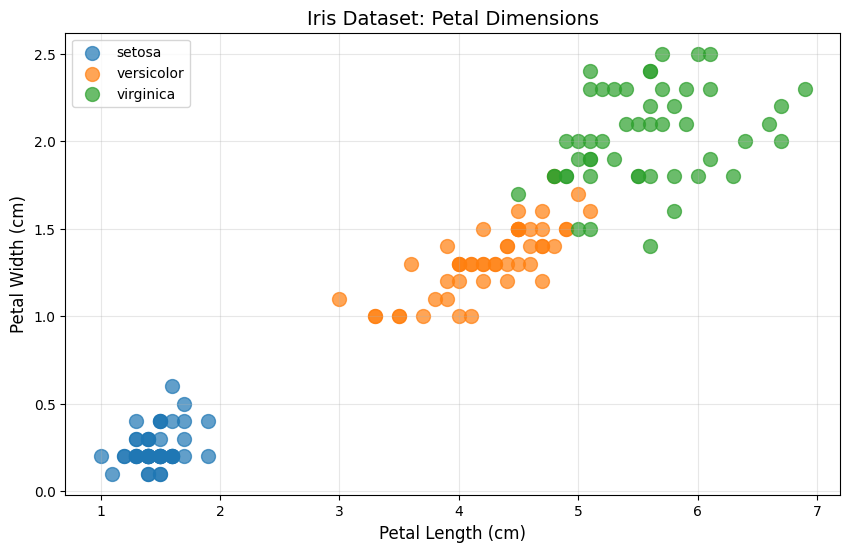

Notice how the species form clusters? That's why KNN works!


In [4]:
# Visualize petal dimensions (features 2 and 3)
plt.figure(figsize=(10, 6))

# Plot each species with different colors
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 2], X[mask, 3], label=species, alpha=0.7, s=100)

plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Iris Dataset: Petal Dimensions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Notice how the species form clusters? That's why KNN works!")

---

## Part 3: Train-Test Split

We split data into:
- **Training set (70%)**: Used to "teach" the algorithm
- **Test set (30%)**: Used to evaluate on unseen data

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 120
Test samples: 30


---

## Part 4: Implementing KNN from Scratch

### How KNN Works:

1. Calculate distance from new point to all training points
2. Find K nearest neighbors
3. Take majority vote among neighbors
4. Return the most common class

We'll implement this step by step with **testable functions**.

### Step 4.1: Euclidean Distance

First, we need a way to measure how "close" two points are.  
Formula: \\( d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} \\)

In [ ]:
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    
    Parameters:
    -----------
    point1 : numpy array
        First point
    point2 : numpy array
        Second point
    
    Returns:
    --------
    float
        Distance between the points
    
    Example:
    --------
    >>> euclidean_distance(np.array([0, 0]), np.array([3, 4]))
    5.0
    """
    # TODO: Implement the Euclidean distance formula
    # Hint: Use np.sqrt() and np.sum()
    # YOUR CODE HERE
    pass

In [ ]:
# Test your function
p1 = np.array([0, 0])
p2 = np.array([3, 4])
dist = euclidean_distance(p1, p2)
print(f"Distance between {p1} and {p2}: {dist}")
print(f"Expected: 5.0")

# Another test
p3 = np.array([1, 2, 3])
p4 = np.array([4, 5, 6])
dist2 = euclidean_distance(p3, p4)
print(f"\nDistance between {p3} and {p4}: {dist2:.2f}")
print(f"Expected: 5.20")

### Step 4.2: Classify a Single Example

Now let's classify ONE test point using the KNN algorithm.

In [ ]:
def classify_example(X_train, y_train, test_point, k=3):
    """
    Classify a single test point using KNN.
    
    Parameters:
    -----------
    X_train : numpy array, shape (n_samples, n_features)
        Training data
    y_train : numpy array, shape (n_samples,)
        Training labels
    test_point : numpy array, shape (n_features,)
        Point to classify
    k : int
        Number of neighbors to consider
    
    Returns:
    --------
    int
        Predicted class label
    """
    # TODO: Implement KNN classification for one point
    # Steps:
    # 1. Calculate distances from test_point to all training points
    # 2. Find indices of k smallest distances (use np.argsort)
    # 3. Get labels of k nearest neighbors
    # 4. Return most common label (use np.bincount and np.argmax)
    
    # YOUR CODE HERE
    pass

In [ ]:
# Test your function
test_sample = X_test[0]
prediction = classify_example(X_train, y_train, test_sample, k=3)
actual = y_test[0]

print(f"Test sample features: {test_sample}")
print(f"Predicted class: {prediction} ({iris.target_names[prediction]})")
print(f"Actual class: {actual} ({iris.target_names[actual]})")
print(f"Correct: {prediction == actual}")

### Step 4.3: Predict Multiple Examples

Now let's classify ALL test points at once.

In [ ]:
def predict(X_train, y_train, X_test, k=3):
    """
    Classify multiple test points using KNN.
    
    Parameters:
    -----------
    X_train : numpy array, shape (n_samples, n_features)
        Training data
    y_train : numpy array, shape (n_samples,)
        Training labels
    X_test : numpy array, shape (n_test_samples, n_features)
        Test data to classify
    k : int
        Number of neighbors to consider
    
    Returns:
    --------
    numpy array, shape (n_test_samples,)
        Predicted class labels
    """
    # TODO: Use classify_example for each test point
    # Hint: Loop through X_test and collect predictions
    
    # YOUR CODE HERE
    pass

In [ ]:
# Test your predict function
y_pred_scratch = predict(X_train, y_train, X_test, k=3)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

print(f"Predictions: {y_pred_scratch}")
print(f"Actual labels: {y_test}")
print(f"\nAccuracy: {accuracy_scratch:.2%}")
print(f"Correct predictions: {np.sum(y_pred_scratch == y_test)}/{len(y_test)}")

---

## Part 5: Using Scikit-Learn

Great! Now you understand how KNN works internally.  
In practice, we use optimized libraries like scikit-learn.

In [ ]:
# Create and train KNN using sklearn
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Scikit-learn accuracy: {accuracy_sklearn:.2%}")
print(f"\nOur implementation: {accuracy_scratch:.2%}")
print(f"Sklearn implementation: {accuracy_sklearn:.2%}")
print(f"\n✓ Both implementations should give the same results!")

---

## Part 6: Visualizing Decision Boundaries

Let's see how KNN makes decisions visually. We'll use only 2 features for easy visualization.

In [ ]:
# Use only petal length and petal width for visualization
X_2d = X[:, 2:4]  # Features 2 and 3
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Create a mesh to plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 5))

# Left plot: Decision boundaries
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=species, alpha=0.7, s=50, edgecolor='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Decision Boundaries (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Test points
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
# Show training points in gray
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='gray', alpha=0.3, s=30, label='Training')
# Show test points with actual colors
y_pred_2d = knn_2d.predict(X_test_2d)
correct = y_pred_2d == y_test_2d
plt.scatter(X_test_2d[correct, 0], X_test_2d[correct, 1], c='green', s=100, 
           marker='o', edgecolor='black', linewidth=2, label='Correct')
plt.scatter(X_test_2d[~correct, 0], X_test_2d[~correct, 1], c='red', s=100, 
           marker='x', linewidth=3, label='Wrong')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f'Test Predictions (Accuracy: {accuracy_score(y_test_2d, y_pred_2d):.2%})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🤔 Discussion: Decision Boundaries

Look at the visualization above:

1. **What do the colored regions represent?**  
   _(Hint: These are the decision boundaries - where KNN would classify any point in that region)_

2. **Why are the boundaries not straight lines?**  
   _(Think about how KNN makes decisions - it's based on nearest neighbors, not a linear equation)_

3. **What happens if we change k to 1 or 10?**  
   _(You can experiment by changing n_neighbors above and re-running!)_

---

## Part 7: Experimenting with K

Let's quickly see how different K values affect our results.

In [ ]:
# Try different k values
k_values = [1, 3, 5, 7, 10, 15]
print("K value → Accuracy")
print("-" * 25)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k:2d}  →  {acc:.2%}")

---

## 🎉 Congratulations!

You've completed Lab 0! You now know:

✅ How to work with Jupyter Notebooks  
✅ How to load and explore data  
✅ How KNN algorithm works internally  
✅ How to implement ML algorithms from scratch  
✅ How to use scikit-learn for faster implementation  
✅ How to visualize decision boundaries  

### Key Takeaways:

- **KNN is a "lazy learner"**: It doesn't really train, just stores data
- **Distance matters**: Similar points should be close in feature space
- **K is important**: Too small → overfitting, too large → underfitting
- **Libraries exist for a reason**: Sklearn is faster and more optimized!

### Next Steps:

1. Make sure all cells run without errors
2. Commit and push to GitHub
3. Your code will be automatically tested
4. In Lab 1, you'll work more independently!

---

**Remember the AI usage policy:** Use approved prompts only! 🤖